# Importando base de dados

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('tips.csv')

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
         'total_bill':'valor_da_conta',
         'tip':'gorjeta',
         'dessert':'sobremesa',
         'day':'dia_da_semana',
         'time':'hora',
         'size':'pessoas'
}

In [7]:
gorjetas = dados.rename(columns = renomear)

In [8]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
sim_nao = {'No':'Não', 'Yes':'Sim'}

In [10]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [11]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [12]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [13]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
dias = {'Sun':'Domingo',
        'Sat':'Sabado',
        'Thur':'Quinta',
        'Fri':'Sexta'}

In [15]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [16]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Dinner,3
240,27.18,2.00,Sim,Sabado,Dinner,2
241,22.67,2.00,Sim,Sabado,Dinner,2
242,17.82,1.75,Não,Sabado,Dinner,2


In [17]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [18]:
hora = {
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

In [19]:
gorjetas.hora = gorjetas.hora.map(hora)

In [20]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Jantar,3
240,27.18,2.00,Sim,Sabado,Jantar,2
241,22.67,2.00,Sim,Sabado,Jantar,2
242,17.82,1.75,Não,Sabado,Jantar,2


 # Seaborn

In [21]:
import seaborn as sns

#### Analise da conta e da gosteja

In [22]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana', 'hora',
       'pessoas'],
      dtype='object')

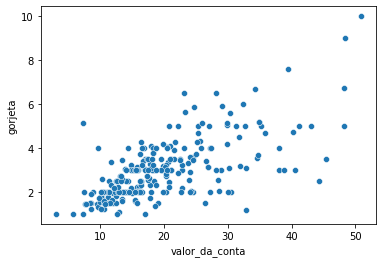

In [23]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta',y = "gorjeta", data=gorjetas)

### Criando campo porcentagem


In [24]:
gorjetas['porcentagem'] = gorjetas.gorjeta/gorjetas.valor_da_conta

In [25]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Jantar,3,0.203927
240,27.18,2.00,Sim,Sabado,Jantar,2,0.073584
241,22.67,2.00,Sim,Sabado,Jantar,2,0.088222
242,17.82,1.75,Não,Sabado,Jantar,2,0.098204


In [26]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

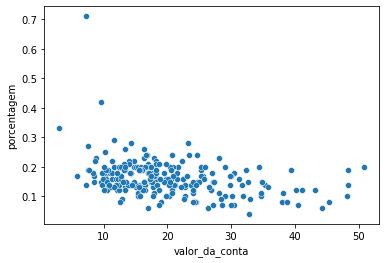

In [27]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

*** Visualmente, o valor da gorjeta não é proporcional ao valor da conta ***

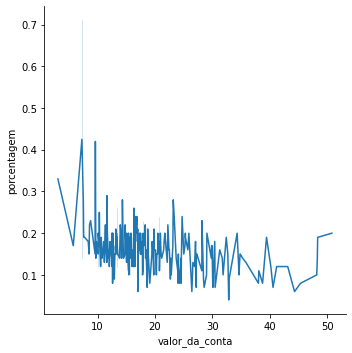

In [28]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem',kind='line', data=gorjetas)

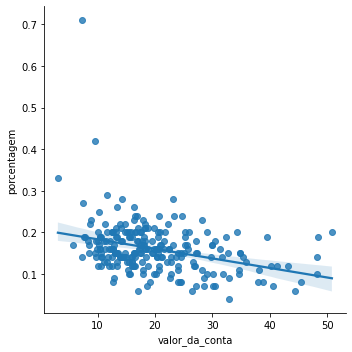

In [29]:
sns.lmplot(x='valor_da_conta', y='porcentagem',data=gorjetas)

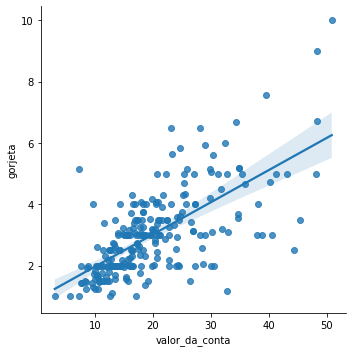

In [30]:
sns.lmplot(x='valor_da_conta', y='gorjeta',data=gorjetas)

## Análise Sobremesa

In [31]:
gorjetas[gorjetas.sobremesa == "Sim"].describe()

,valor_da_conta,gorjeta,pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [32]:
gorjetas[gorjetas.sobremesa == "Não"].describe()

,valor_da_conta,gorjeta,pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


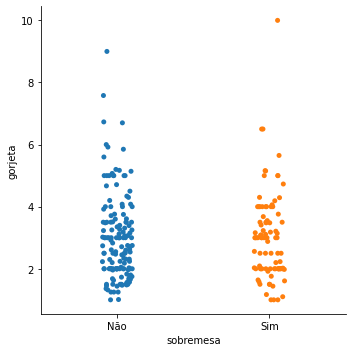

In [33]:
sns.catplot(x='sobremesa',y='gorjeta',data = gorjetas)

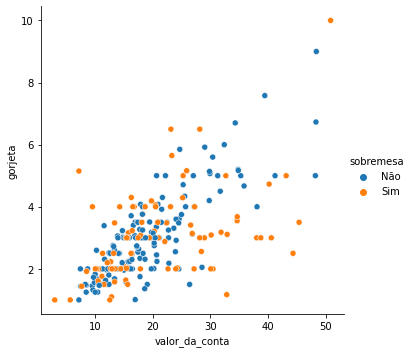

In [34]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='sobremesa',data= gorjetas)

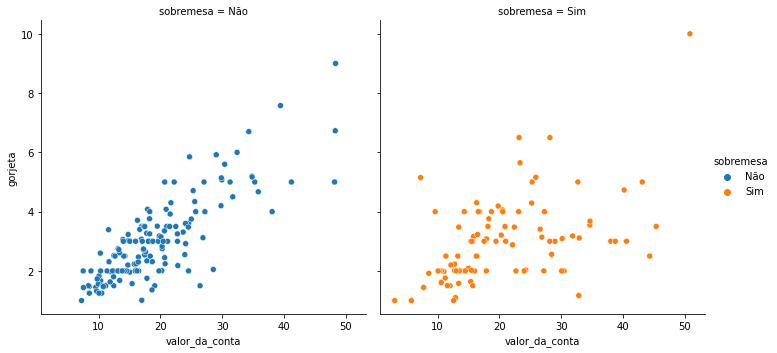

In [35]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='sobremesa',col='sobremesa',data= gorjetas)

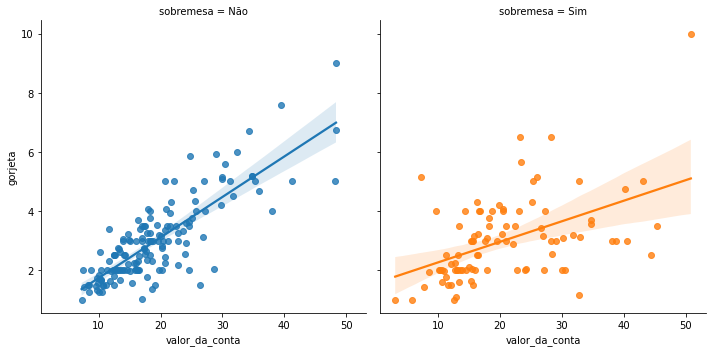

In [36]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas)

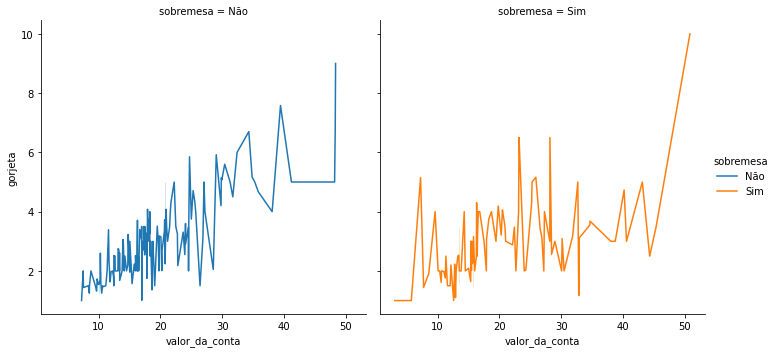

In [37]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='sobremesa',col='sobremesa',kind='line',data= gorjetas)

## Teste de hipótese

In [38]:
from scipy.stats import ranksums

In [39]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [40]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [41]:
r = ranksums(sobremesa,sem_sobremesa)

In [42]:
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

## Análise dia da semana

In [43]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

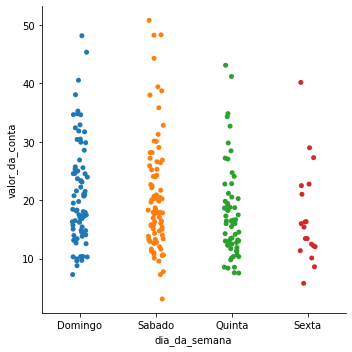

In [44]:
sns.catplot(x='dia_da_semana',y="valor_da_conta", data=gorjetas)

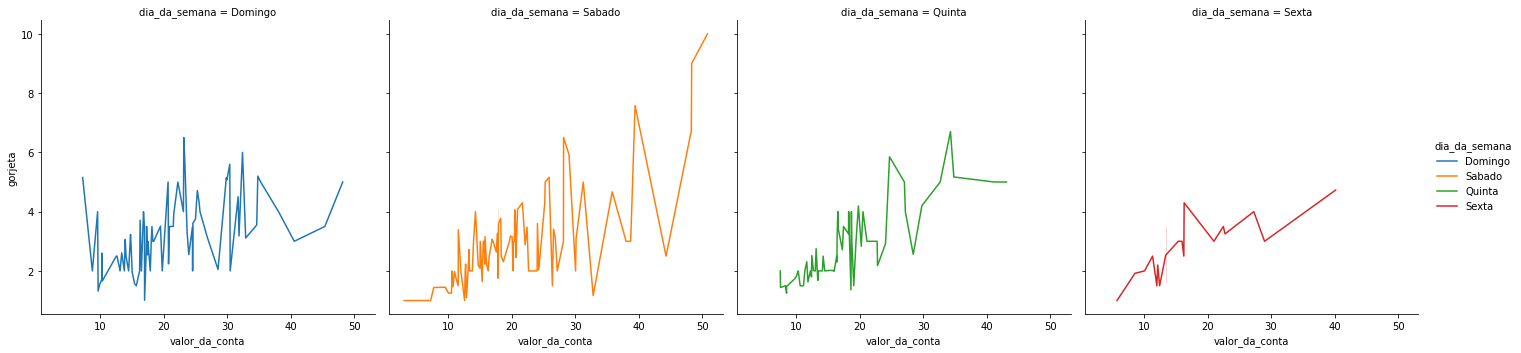

In [47]:
sns.relplot(x='valor_da_conta', y="gorjeta",hue="dia_da_semana",kind="line",col="dia_da_semana",data = gorjetas)

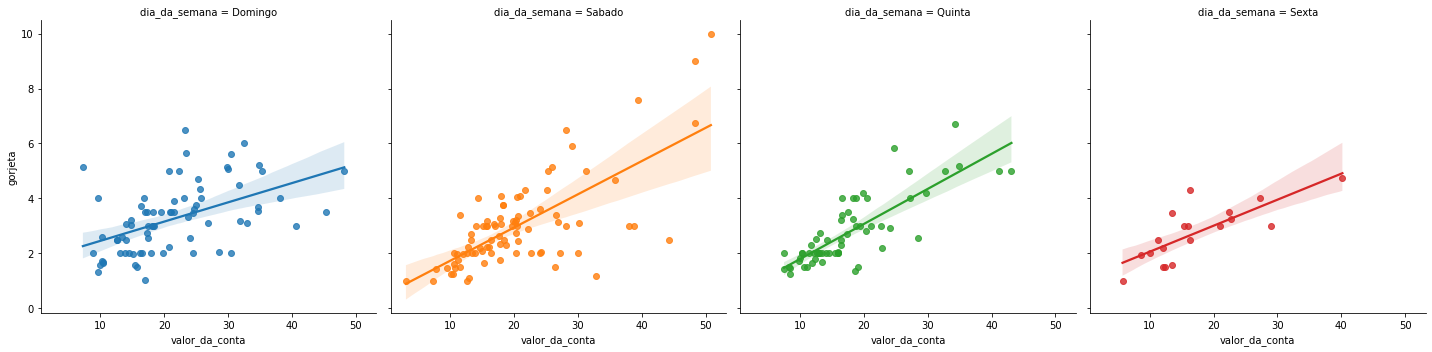

In [49]:
sns.lmplot(x='valor_da_conta', y="gorjeta",hue="dia_da_semana",col="dia_da_semana",data = gorjetas)

#### Porcentagem

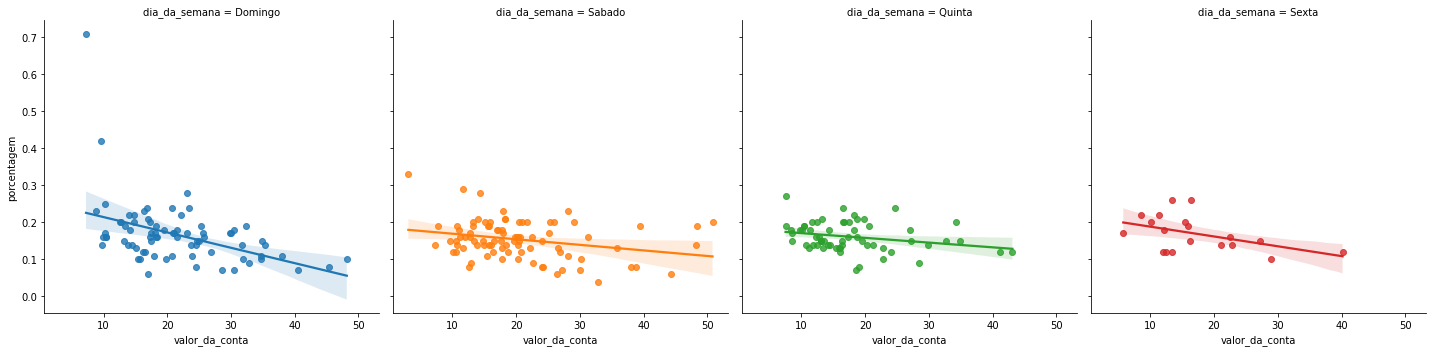

In [52]:
sns.lmplot(x='valor_da_conta', y="porcentagem",hue="dia_da_semana",col="dia_da_semana",data = gorjetas)

In [53]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [54]:
media_geral_gorjetas

2.9982786885245902

In [56]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [57]:
gorjetas.dia_da_semana.value_counts()

Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

In [58]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [60]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta

In [62]:
ranksums(valor_conta_sabado, valor_conta_domingo)

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

**A distribuição do valor da conta é igual no sabado e no domingo**

# Analise Hora do Dia

In [64]:
gorjetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

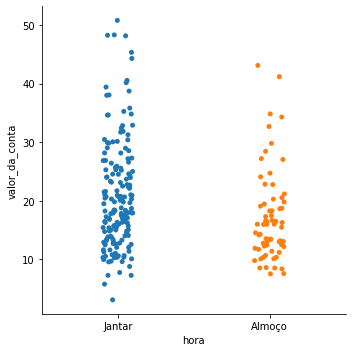

In [65]:
sns.catplot(x='hora',y='valor_da_conta',data=gorjetas)

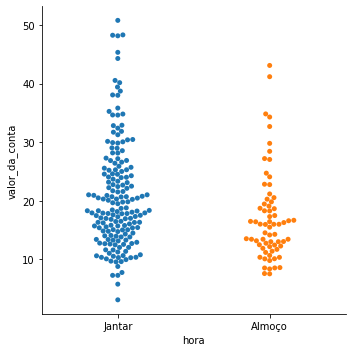

In [66]:
sns.catplot(x='hora',y='valor_da_conta',kind='swarm',data=gorjetas)

<AxesSubplot:xlabel='hora', ylabel='valor_da_conta'>

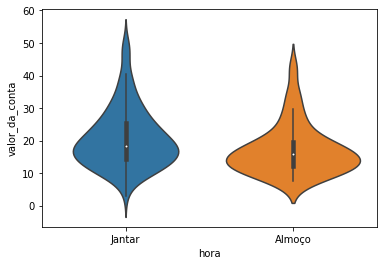

In [67]:
sns.violinplot(x='hora',y='valor_da_conta',data=gorjetas)

<AxesSubplot:xlabel='hora', ylabel='valor_da_conta'>

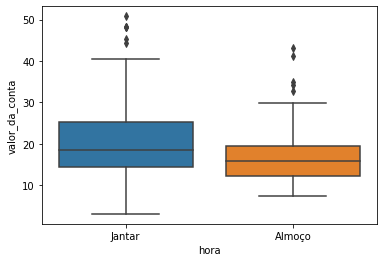

In [68]:
sns.boxplot(x='hora',y='valor_da_conta',data=gorjetas)

In [70]:
almoco = gorjetas.query("hora == 'Almoço'").valor_da_conta

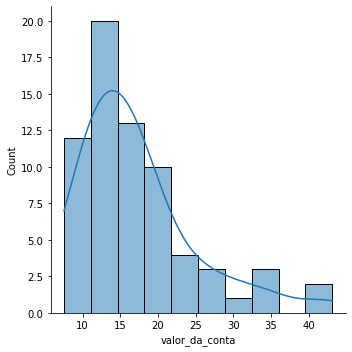

In [75]:
sns.displot(almoco, kde=True)

In [76]:
jantar = gorjetas.query("hora == 'Jantar'").valor_da_conta

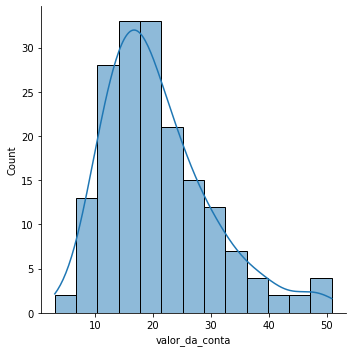

In [78]:
sns.displot(jantar, kde=True)

In [80]:
gorjetas.groupby(['hora']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [81]:
r = ranksums(jantar, almoco)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

**A Distribuição do valor da conta não é igual no jantar e no almoço**